![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 17 - Boosting</center>
### <center> AdaBoost</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/17_Boosting/MainAdaBoost1.ipynb)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

# np.random.seed(1)

### Generate some data:

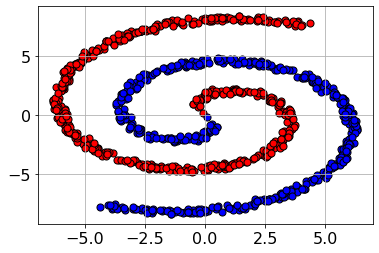

In [3]:
N     = 500
vN    = np.sqrt(np.random.rand(N, 1)) * 480 * 2 * np.pi / 360
vCos  = -vN * np.cos(vN) + np.random.rand(N, 1) / 2
vSin  = vN  * np.sin(vN) + np.random.rand(N, 1) / 2
mX1   =  np.c_[vCos, vSin]
mX2   = -np.c_[vCos, vSin]
mX    = np.r_[mX1, mX2]
vY    = np.r_[-np.ones(N), np.ones(N)]
N     = len(vY)
vIdx0 = vY == -1
vIdx1 = vY ==  1

plt.figure(), plt.grid(True)
plt.scatter(mX[vIdx0,0], mX[vIdx0,1], s=50, color='r', edgecolors='k')
plt.scatter(mX[vIdx1,0], mX[vIdx1,1], s=50, color='b', edgecolors='k')
plt.show()

### Train an AdaBoost classifier:

In [4]:
from sklearn.ensemble import AdaBoostClassifier

M         = 100
oAdaBoost = AdaBoostClassifier(n_estimators=M, algorithm='SAMME').fit(mX, vY)

### Plot:

In [5]:
def PlotAdaBoost(M):
    
    def Predict(oAdaBoost, M, mX, vY = None):
        N         = mX.shape[0]
        vW        = np.ones(N) / N
        vH        = np.zeros(N)
        vTrainErr = np.full(M, np.nan)
        vLoss     = np.full(M, np.nan)
        for mm in range(M):
            alpha_m = oAdaBoost.estimator_weights_[mm]
            h_m     = oAdaBoost.estimators_[mm]
            vHatYm  = h_m.predict(mX)
            vH     += alpha_m * vHatYm

            if vY is not None:
                vW             = vW * np.exp(-alpha_m * vY * h_m.predict(mX))
                vW            /= np.sum(vW)
                vTrainErr[mm]  = np.mean(np.sign(vH) != vY)
                vLoss[mm]      = np.mean(np.exp(-vH * vY))
        
        vH = np.sign(vH)
        
        return vH, vW, vTrainErr, vLoss
        
    v0       = np.linspace(mX[:,0].min(), mX[:,0].max(), 150)
    v1       = np.linspace(mX[:,1].min(), mX[:,1].max(), 150)
    XX0, XX1 = np.meshgrid(v0, v1)
    XX       = np.c_[XX0.ravel(), XX1.ravel()]

    _, vW, vTrainErr, vLoss = Predict(oAdaBoost, M, mX, vY)
    ZZ                      = Predict(oAdaBoost, M, XX)[0]
    ZZ                      = np.reshape(ZZ, XX0.shape)

    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.contourf(XX0, XX1, ZZ, colors=['red', 'blue'], alpha=0.3)
    plt.scatter(mX[vIdx0,0], mX[vIdx0,1], s=50*N*vW[vIdx0], color='r', edgecolors='k')
    plt.scatter(mX[vIdx1,0], mX[vIdx1,1], s=50*N*vW[vIdx1], color='b', edgecolors='k')
    plt.title('$M = ' + str(M) + '$')
                                        
    plt.subplot(1,2,2), plt.grid(True)
    plt.plot(vTrainErr, 'b', lw=2, label='train error')
    plt.plot(vLoss,     'r', lw=2, label='train loss')
    plt.legend()
    
    plt.tight_layout()

In [6]:
from ipywidgets import interact, IntSlider, Layout

mSlider = IntSlider(min=1, max=M, step=1, value=1, layout=Layout(width='80%'))
interact(PlotAdaBoost, M=mSlider)
plt.show()

interactive(children=(IntSlider(value=1, description='M', layout=Layout(width='80%'), min=1), Output()), _dom_…

### Load heart dataset:
https://www.kaggle.com/ronitf/heart-disease-uci

In [7]:
dData         = pd.read_csv('../../data/Heart/heart.csv')
dData.columns = ['Age', 'Sex', 'ChestPainType', 'RestingBloodPressure', 'Cholesterol', 'FastingBloodSugar', 'RestECG', 'MaxHeartRateAchieved',
                 'ExerciseInducedAngina', 'StDepression', 'StSlope', 'NumMajorVessels', 'Thalassemia', 'Target']

In [8]:
dData.loc[dData['Sex']                   == 0, 'Sex']                   = 'female'
dData.loc[dData['Sex']                   == 1, 'Sex']                   = 'male'
        
dData.loc[dData['ChestPainType']         == 1, 'ChestPainType']         = 'typical angina'
dData.loc[dData['ChestPainType']         == 2, 'ChestPainType']         = 'atypical angina'
dData.loc[dData['ChestPainType']         == 3, 'ChestPainType']         = 'non-anginal pain'
dData.loc[dData['ChestPainType']         == 4, 'ChestPainType']         = 'asymptomatic'

dData.loc[dData['FastingBloodSugar']     == 0, 'FastingBloodSugar']     = 'lower than 120mg/ml'
dData.loc[dData['FastingBloodSugar']     == 1, 'FastingBloodSugar']     = 'greater than 120mg/ml'

dData.loc[dData['RestECG']               == 0, 'RestECG']               = 'normal'
dData.loc[dData['RestECG']               == 1, 'RestECG']               = 'ST-T wave abnormality'
dData.loc[dData['RestECG']               == 2, 'RestECG']               = 'left ventricular hypertrophy'

dData.loc[dData['ExerciseInducedAngina'] == 0, 'ExerciseInducedAngina'] = 'no'
dData.loc[dData['ExerciseInducedAngina'] == 1, 'ExerciseInducedAngina'] = 'yes'

dData.loc[dData['StSlope']               == 1, 'StSlope']               = 'upsloping'
dData.loc[dData['StSlope']               == 2, 'StSlope']               = 'flat'
dData.loc[dData['StSlope']               == 3, 'StSlope']               = 'downsloping'

dData.loc[dData['Thalassemia']           == 1, 'Thalassemia']            = 'normal'
dData.loc[dData['Thalassemia']           == 2, 'Thalassemia']            = 'fixed defect'
dData.loc[dData['Thalassemia']           == 3, 'Thalassemia']            = 'reversable defect'

dData.loc[dData['Target']                == 0, 'Target']                 = 'hearth disease'
dData.loc[dData['Target']                == 1, 'Target']                 = 'no hearth disease'

In [9]:
dData = pd.get_dummies(dData, drop_first=True)
dData

,Age,RestingBloodPressure,Cholesterol,MaxHeartRateAchieved,StDepression,NumMajorVessels,Sex_male,ChestPainType_atypical angina,ChestPainType_non-anginal pain,ChestPainType_typical angina,FastingBloodSugar_lower than 120mg/ml,RestECG_left ventricular hypertrophy,RestECG_normal,ExerciseInducedAngina_yes,StSlope_flat,StSlope_upsloping,Thalassemia_fixed defect,Thalassemia_normal,Thalassemia_reversable defect,Target_no hearth disease
0,63,145,233,150,2.3,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
1,37,130,250,187,3.5,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1
3,56,120,236,178,0.8,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1
4,57,120,354,163,0.6,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
299,45,110,264,132,1.2,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
300,68,144,193,141,3.4,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0
301,57,130,131,115,1.2,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0


In [10]:
dTrainX = dData.drop(columns=['Target_no hearth disease'])
dY      = dData['Target_no hearth disease']

### Train an SVM classifier (cross-validation)

In [11]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm             import SVC

svmModel = SVC(kernel='linear')
scores   = cross_val_score(svmModel, dTrainX, dY, cv=KFold(20, shuffle=True))
scores.mean()

0.8154166666666667

### Train an AdaBoost classifier (cross-validation)

In [12]:
from sklearn.ensemble import AdaBoostClassifier

scores = cross_val_score(AdaBoostClassifier(algorithm='SAMME'), dTrainX, dY, cv=KFold(20, shuffle=True))
scores.mean()

0.8220833333333333

### Search SVM hyper-parameters (using grid search):

In [13]:
from sklearn.model_selection import GridSearchCV

dSvmParams = {'kernel': ('linear', 'rbf'),
              'C'     : np.linspace(0.0001, 3, 21)}

oSearch    = GridSearchCV(SVC(), dSvmParams, cv=KFold(20, shuffle=True)).fit(dTrainX, dY)

print(f'Best parameters CV score = {oSearch.best_score_}')
print(oSearch.best_params_)

Best parameters CV score = 0.8383333333333333
{'C': 2.10003, 'kernel': 'linear'}


### Search AdaBoost hyper-parameters (using grid search):

In [14]:
from sklearn.model_selection import GridSearchCV

dAdaBoostParams = {'n_estimators'  : np.arange(35, 100, 5),
                   'learning_rate' : np.linspace(0.1, 1, 10)
                  }

oSearch   = GridSearchCV(AdaBoostClassifier(algorithm='SAMME'), dAdaBoostParams, cv=KFold(20, shuffle=True)).fit(dTrainX, dY)

print(f'Best parameters CV score = {oSearch.best_score_}')
print(oSearch.best_params_)

Best parameters CV score = 0.8510416666666668
{'learning_rate': 0.30000000000000004, 'n_estimators': 40}
